#  Linear Regression

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
import sklearn.metrics as metrics

### Uploading data

In [2]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/Dataset.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Date,symbol,sector,score,close,return_rate
0,2004-02-11,SU,Energy Minerals,0.953727,12.830000,NaN
1,2004-02-11,GGG,Producer Manufacturing,0.952753,9.322222,NaN
2,2004-02-11,CWT,Utilities,0.934181,14.245000,NaN
3,2004-02-11,BLL,Process Industries,0.922862,8.012500,NaN
4,2004-02-11,APA,Energy Minerals,0.912117,39.509998,NaN


In [4]:
nan_rows = data[data['return_rate'].isnull()]
if nan_rows.symbol.nunique() == len(nan_rows):
    print("NaN for first period")


NaN for first period


Replacing NaNs with 0 value:

In [5]:
data['return_rate'] = data['return_rate'].fillna(0)

Looking at the tail of the data, meaning the newest observations:

In [6]:
data.tail()

,Date,symbol,sector,score,close,return_rate
30546,2022-02-09,PEP,Consumer Non-Durables,0.701507,171.940002,-0.003189
30547,2022-02-09,SSNC,Technology Services,0.701123,82.419998,0.025890
30548,2022-02-09,GEF,Process Industries,0.697954,56.930000,-0.001753
30549,2022-02-09,DPZ,Consumer Services,0.697741,444.760010,0.015272
30550,2022-02-09,LIFZF,Non-Energy Minerals,0.695644,34.410000,0.069630


### Information about dataset

Data types:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30551 entries, 0 to 30550
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         30551 non-null  object 
 1   symbol       30551 non-null  object 
 2   sector       30551 non-null  object 
 3   score        30551 non-null  float64
 4   close        30551 non-null  float64
 5   return_rate  30551 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.4+ MB


Checking if there is any lack of data:

In [8]:
data.isnull().sum()

Date           0
symbol         0
sector         0
score          0
close          0
return_rate    0
dtype: int64

Changing the type of 'date' variable:

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data = data.set_index('Date')

#### Fundamental statistics on numeric variables

In [10]:
data.describe()

,score,close,return_rate
count,30551.000000,30551.000000,30551.000000
mean,0.731206,101.353658,0.003849
std,0.117692,2627.016498,0.044643
min,0.413554,0.020000,-0.951550
25%,0.653428,26.072500,-0.016298
50%,0.741474,44.770000,0.002865
75%,0.813471,73.910004,0.023672
max,0.987225,453000.000000,0.632911


There are in total 30 551 observations. The mean score for this dataset is 0,73, mean closing price is 101,3 and mean return rate is 0,004.

In [11]:
data.symbol.value_counts()

SHW      170
GEF      140
ORLY     138
INGR     122
GPC      122
        ... 
VIVO       1
MTEX       1
MITT       1
BMI        1
EXCOF      1
Name: symbol, Length: 1338, dtype: int64

There are 1338 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Splitting the data into training and testing sets

Training set involves data from 2010 to 2020 and testing set includes the year 2021.


In [12]:
X_train = data['2010':'2020'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_train = data.loc['2010':'2020', 'return_rate']

X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)
y_test = data.loc['2021', 'return_rate']

<ipython-input-12-e0a87765a94e>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data['2021'].drop(['symbol','sector','return_rate', 'close'], axis = 1)


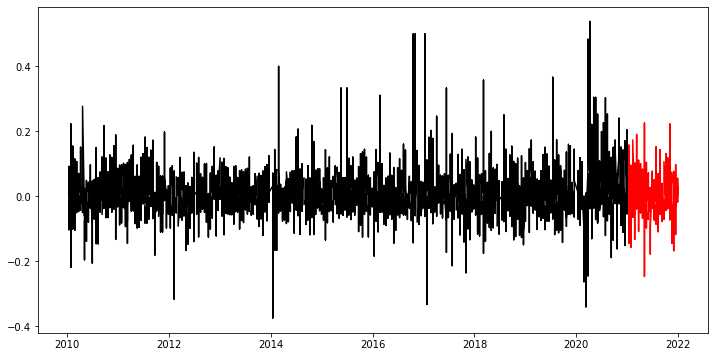

In [13]:
fig, ax=plt.subplots(figsize=(12, 6))

plt.plot(y_train, color = "black")
plt.plot(y_test, color = "red")

In [14]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (19797, 1)
Number transactions y_train dataset:  (19797,)
Number transactions X_test dataset:  (2021, 1)
Number transactions y_test dataset:  (2021,)


### Dummy regression

In [15]:
from sklearn.dummy import DummyRegressor

In [16]:
# train model
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

print('Coefficient of determination:', reg_dummy.score(X_train, y_train))

Coefficient of determination: 0.0


0% represents a model that does not explain any of the variation in the response variable around its mean.

In [17]:
# predict & evaluate
y_pred_dum = reg_dummy.predict(X_test)

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred_dum) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred_dum - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred_dum))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

Coefficient of determination (R2): -0.00140
Mean absolute error (MAE): 0.03097
Residual sum of squares (MSE): 0.00178
Root mean squared error (RMSE): 0.04214


### Linear regression

In [18]:
from sklearn import metrics

# train model
lm = LinearRegression().fit(X_train, y_train)

print('Coefficient of determination:', lm.score(X_train, y_train))
print('Intercept:', lm.intercept_)
print('Slope:', lm.coef_)

Coefficient of determination: 0.005437296983874185
Intercept: 0.02420106384509441
Slope: [-0.02744261]


f(x) = b₁x + b₀

f(x) = - 0.027x + 0.024

𝑅² = 0.0054

Model explains only 0.0054 of the variation in the response variable around its mean.

**Measure of fit of a model**

In [19]:
# predict & evaluate
y_pred = lm.predict(X_test)

print('predicted response:', y_pred, sep='\n')

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted response:
[-0.00099228 -0.00054537 -0.00040295 ...  0.00468725  0.00471852
  0.00475165]
Coefficient of determination (R2): -0.00431
Mean absolute error (MAE): 0.03100
Residual sum of squares (MSE): 0.00178
Root mean squared error (RMSE): 0.04220


Adjusted R squared  is adjusted for the number of independent variables in the model and equal -0.00431 (adjusted  R² will always be less than or equal to R²).

The average of the residuals equal 0.031.

The variance of the residuals equal 0.00178.

The standard deviation of residuals equal 0.0422.

### Comparison between dummy regression and linear regression in combination with observations from test set.

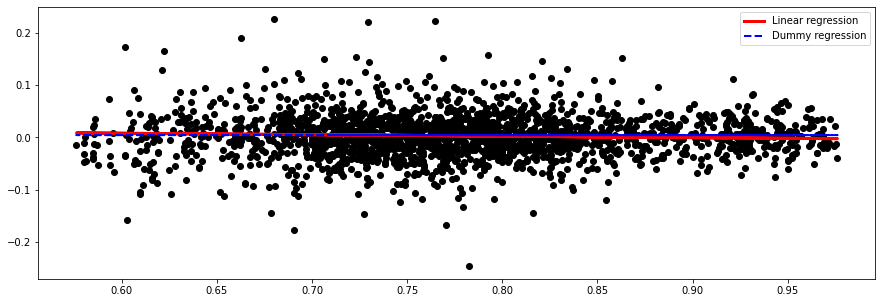

In [20]:
fig, ax=plt.subplots(figsize=(15, 5))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear regression')
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', linewidth=2, label = 'Dummy regression')
ax.legend()

Model does not explain any of the variation in the response variable around its mean.

Linear regression is marginally better than dummy regression.

Both models are not well fit.